<center>



#**Adult Census Income**



---



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install ydata-profiling ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=98fa7b39569032f4fc1c8394a466846b88efacbcb97d85b58608fa0af703cdb6
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/ML_Projects/adult.csv')
df.head(3)

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   

        occupation   relationship   race     sex  capital.gain  capital.loss  \
0                ?  Not-in-family  White  Female             0          4356   
1  Exec-managerial  Not-in-family  White  Female             0          4356   
2                ?      Unmarried  Black  Female             0          4356   

   hours.per.week native.country income  
0              40  United-States  <=50K  
1              18  United-States  <=50K  
2              40  United-States  <=50K

**Profiling Report**

In [ ]:
profile=ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.shape

(32561, 15)

In [ ]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
df.duplicated().sum()

24

**Observations:**

1. There are total 32561 rows and 15 columns.
2. There are 9 Object and 6 integer columns.
3. There are 24 dupilicated values.
4. There is no null values.

In [ ]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [ ]:
df[df=='?']=np.nan

1. Replace the '?' values.

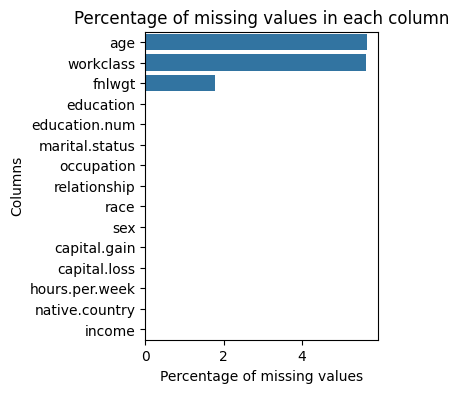

In [ ]:
missing_values_percentage=df.isna().mean()*100

missing_values_sorted=missing_values_percentage.sort_values(ascending=False)
plt.figure(figsize=(3,4))
sns.barplot(x=missing_values_sorted,y=missing_values_percentage.index)
plt.title('Percentage of missing values in each column')
plt.xlabel('Percentage of missing values')
plt.ylabel('Columns')
plt.show()

In [ ]:
for col in ['workclass','occupation','native.country']:
  df[col].fillna(df[col].mode()[0],inplace=True)

In [ ]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
df[df.duplicated(keep=False)]

age         workclass  fnlwgt     education  education.num  \
6227    90           Private   52386  Some-college             10   
7615    19           Private  251579  Some-college             10   
7978    25           Private  308144     Bachelors             13   
8356    21           Private  250051  Some-college             10   
8453    25           Private  308144     Bachelors             13   
8500    38           Private  207202       HS-grad              9   
8645    90           Private   52386  Some-college             10   
9067    27           Private  255582       HS-grad              9   
9269    20           Private  107658  Some-college             10   
9305    25           Private  195994       1st-4th              2   
10307   19           Private  138153  Some-college             10   
10357   49  Self-emp-not-inc   43479  Some-college             10   
11121   49           Private   31267       7th-8th              4   
11261   21           Private  243368     Preschool              1   
11777   28           Private  274679       Masters             14   
12202   21           Private  250051  Some-college             10   
13260   42           Private  204235  Some-college             10   
14346   20           Private  107658  Some-college             10   
14634   46           Private  133616  Some-college             10   
15603   25           Private  195994       1st-4th              2   
17344   21           Private  243368     Preschool              1   
17456   19           Private  146679  Some-college             10   
18417   46           Private  173243       HS-grad              9   
18906   35           Private  379959       HS-grad              9   
19014   30           Private  144593       HS-grad              9   
19067   46           Private  173243       HS-grad              9   
19622   19           Private   97261       HS-grad              9   
19832   44           Private  367749     Bachelors             13   
20388   30           Private  144593       HS-grad              9   
20507   19           Private   97261       HS-grad              9   
22595   23           Private  240137       5th-6th              3   
22783   19           Private  138153  Some-college             10   
22934   19           Private  146679  Some-college             10   
23276   49           Private   31267       7th-8th              4   
23660   25           Private  195994       1st-4th              2   
23720   44           Private  367749     Bachelors             13   
23827   49  Self-emp-not-inc   43479  Some-college             10   
26531   39           Private   30916       HS-grad              9   
26738   23           Private  240137       5th-6th              3   
27133   28           Private  274679       Masters             14   
28796   27           Private  255582       HS-grad              9   
29051   42           Private  204235  Some-college             10   
29334   39           Private   30916       HS-grad              9   
29604   38           Private  207202       HS-grad              9   
31060   46           Private  133616  Some-college             10   
32065   19           Private  251579  Some-college             10   
32419   35           Private  379959       HS-grad              9   

           marital.status         occupation   relationship  \
6227        Never-married      Other-service  Not-in-family   
7615        Never-married      Other-service      Own-child   
7978        Never-married       Craft-repair  Not-in-family   
8356        Never-married     Prof-specialty      Own-child   
8453        Never-married       Craft-repair  Not-in-family   
8500   Married-civ-spouse  Machine-op-inspct        Husband   
8645        Never-married      Other-service  Not-in-family   
9067        Never-married  Machine-op-inspct  Not-in-family   
9269        Never-married       Tech-support  Not-in-family   
9305        Never-married    Priv-house-serv  Not-in-family   
1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique().sort_values()

sex                   2
income                2
race                  5
relationship          6
marital.status        7
workclass             8
occupation           14
education            16
education.num        16
native.country       41
age                  73
capital.loss         92
hours.per.week       94
capital.gain        119
fnlwgt            21648
dtype: int64

In [ ]:
df.drop(columns=['fnlwgt'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   education       32537 non-null  object
 3   education.num   32537 non-null  int64 
 4   marital.status  32537 non-null  object
 5   occupation      32537 non-null  object
 6   relationship    32537 non-null  object
 7   race            32537 non-null  object
 8   sex             32537 non-null  object
 9   capital.gain    32537 non-null  int64 
 10  capital.loss    32537 non-null  int64 
 11  hours.per.week  32537 non-null  int64 
 12  native.country  32537 non-null  object
 13  income          32537 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.7+ MB


In [ ]:
df = df.rename(columns={
    'marital.status': 'marital_status',
    'education.num': 'education_num',
    'native.country': 'native_country',
    'capital.gain': 'capital_gain',
    'capital.loss': 'capital_loss',
    'hours.per.week': 'hours_per_week'
})

df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [ ]:
df2=df.copy()

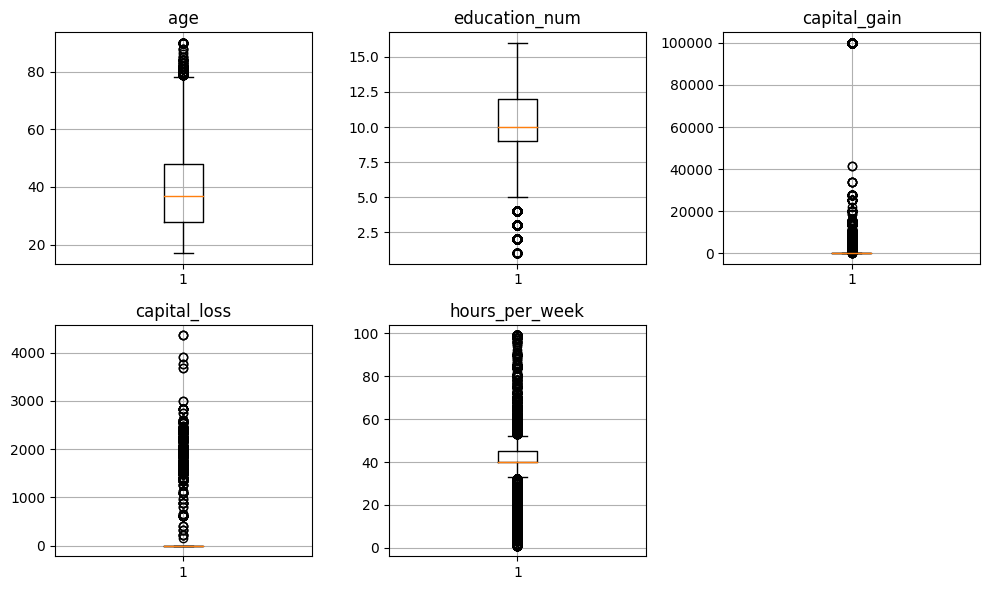

In [ ]:
num_cols=['age','education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
plt.figure(figsize=(10,6))
for i, column in enumerate(num_cols,1):
  plt.subplot(2,3,i)
  plt.boxplot(df[column])
  plt.title(column)
  plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats
### IQR Method ###
# Calculate IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3-Q1

# Identify outliers using IQR method
outliers_iqr = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR)))
no_outliers=df[~outliers_iqr.any(axis=1)]

print("data without outliers :",no_outliers.shape)

### Z-Score Method ###
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[num_cols]))

# Identify outliers using Z-score method
outliers_zscore = (z_scores > 3)

# Remove outliers
no_outliers_zscore = df[~outliers_zscore.any(axis=1)]

print("Data shape after removing outliers using Z-score method:", no_outliers_zscore.shape)

data without outliers : (19606, 14)
Data shape after removing outliers using Z-score method: (30131, 14)


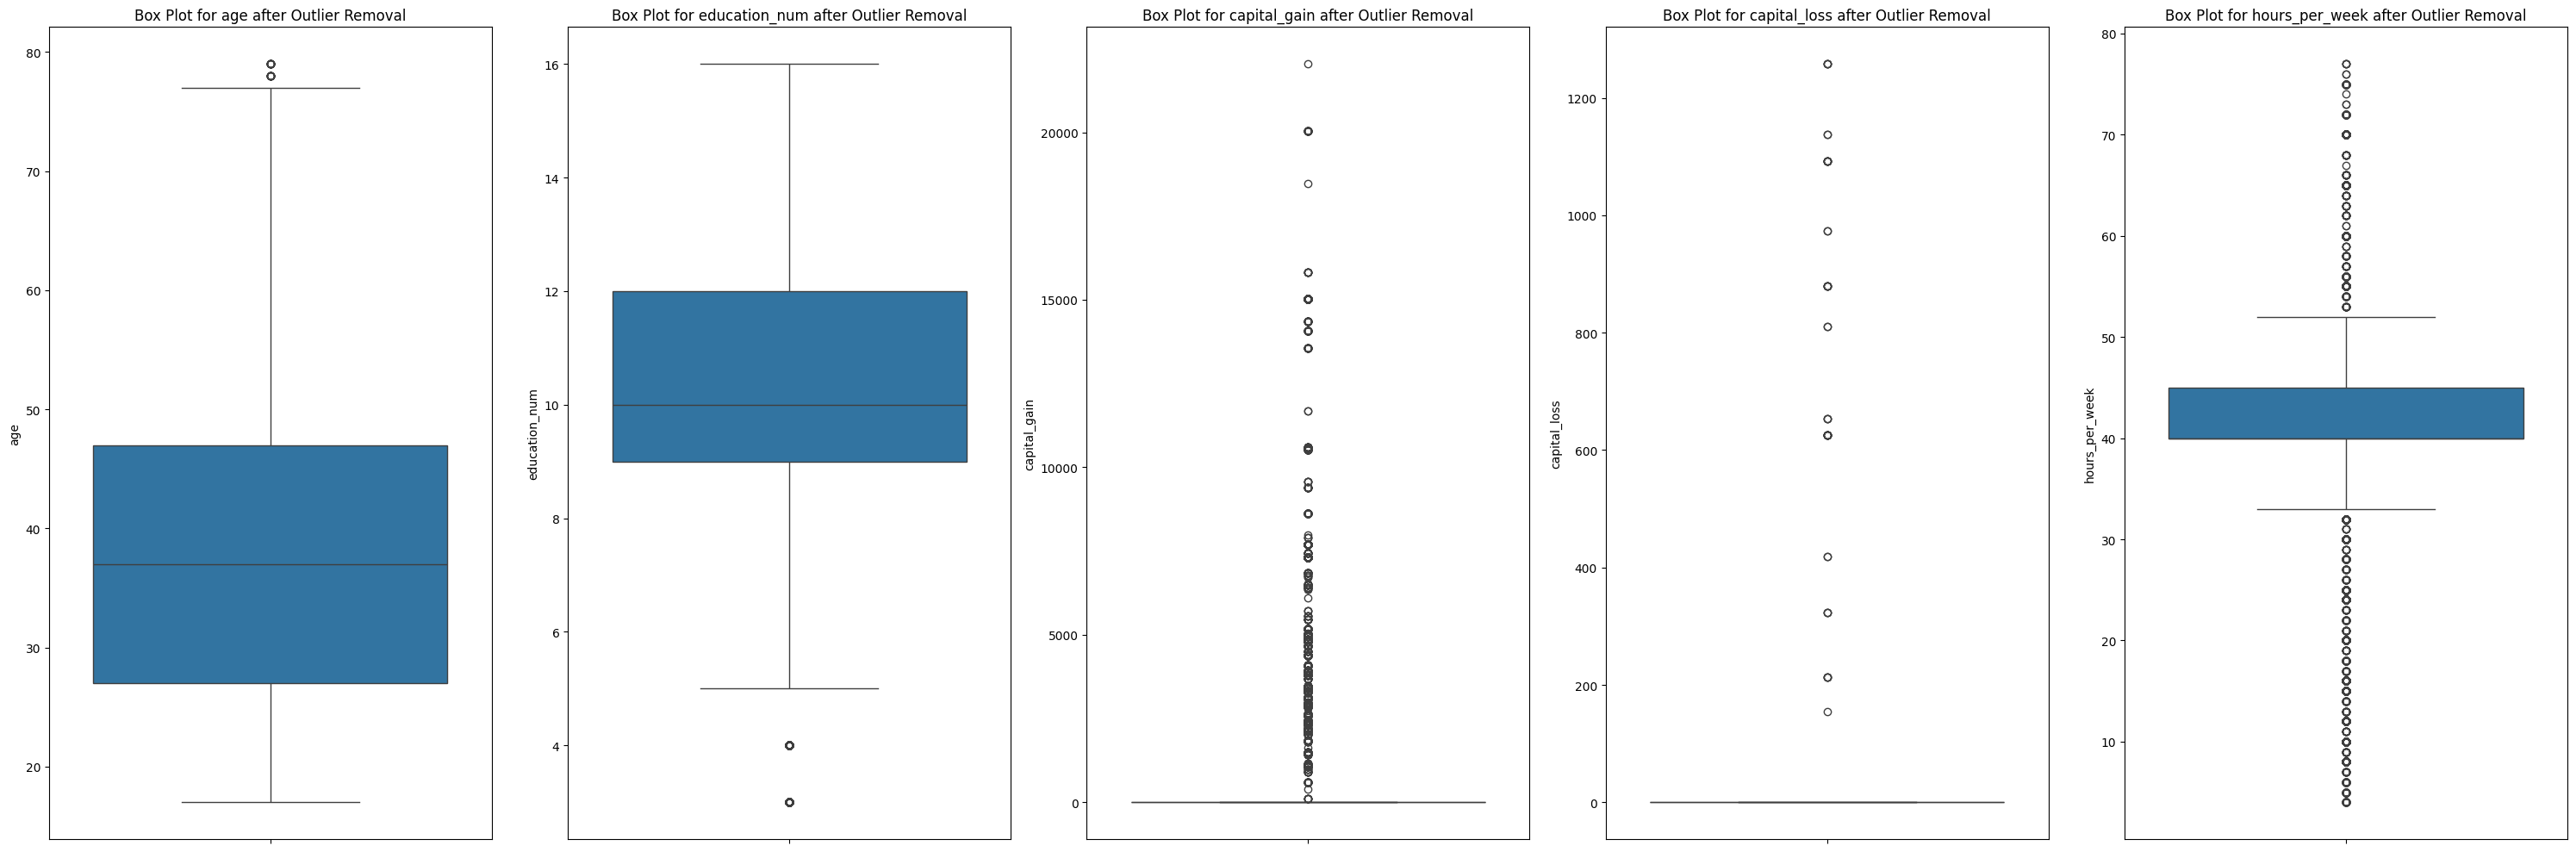

In [ ]:
# Box plots for each column
plt.figure(figsize=(30, 10))
for i, column in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(data=no_outliers_zscore, y=column)
    plt.title(f'Box Plot for {column} after Outlier Removal')
plt.tight_layout()
plt.show()


In [ ]:
# Before outlier removal
print("Before outlier removal:")
print(df[num_cols].describe())

# After outlier removal using Z-score method
print("After outlier removal using Z-score method:")
print(no_outliers_zscore[num_cols].describe())


Before outlier removal:
                age  education_num  capital_gain  capital_loss  hours_per_week
count  32537.000000   32537.000000  32537.000000  32537.000000    32537.000000
mean      38.585549      10.081815   1078.443741     87.368227       40.440329
std       13.637984       2.571633   7387.957424    403.101833       12.346889
min       17.000000       1.000000      0.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000      0.000000       40.000000
75%       48.000000      12.000000      0.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000   4356.000000       99.000000
After outlier removal using Z-score method:
                age  education_num  capital_gain  capital_loss  hours_per_week
count  30131.000000   30131.000000  30131.000000  30131.000000    30131.000000
mean      38.112807      10.075105    570.554612      1.197206 

Text(0.5, 1.0, 'Correlation Matrix')

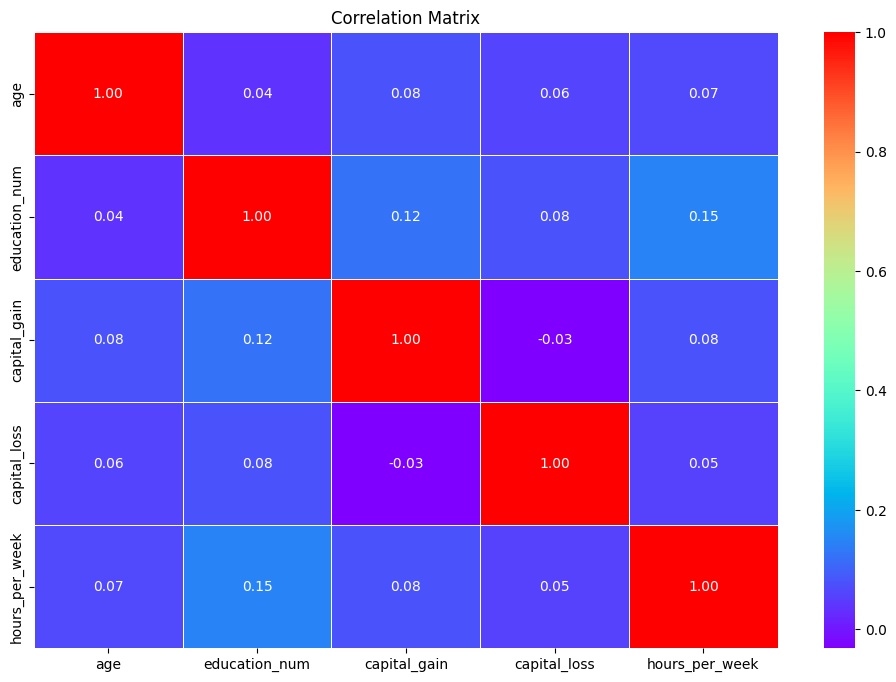

In [ ]:
# Correlation matrix
num_cols = df.select_dtypes(include=['number'])

correlation_matrix = num_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

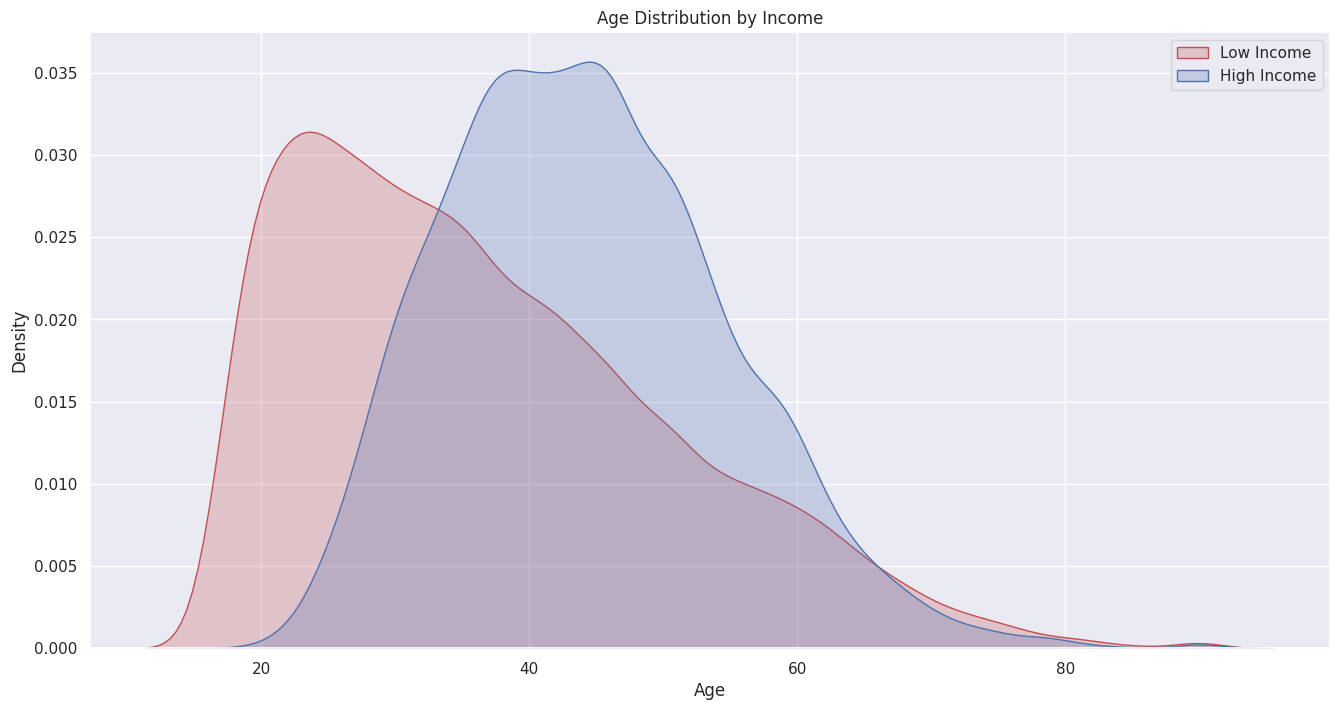

In [ ]:
plt.figure(figsize=(16, 8))

sns.set_theme(style="darkgrid")
sns.set_palette("magma")

sns.kdeplot(data=df[df['income'] == '<=50K']['age'], shade=True, color="r", label="Low Income")
sns.kdeplot(data=df[df['income'] == '>50K']['age'], shade=True, color="b", label="High Income")

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Income')

plt.legend()

plt.show()

<Axes: xlabel='age', ylabel='Density'>

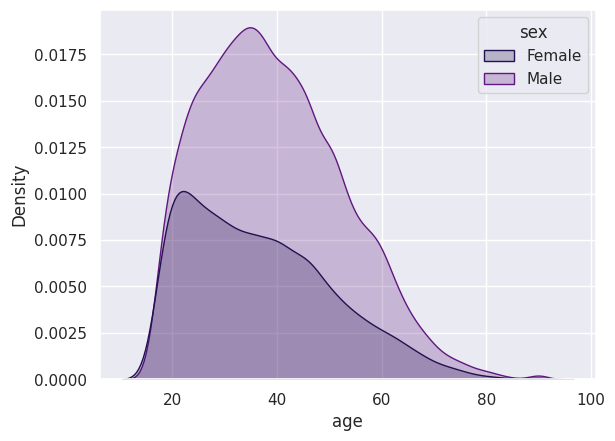

In [ ]:
sns.kdeplot(x='age',hue='sex' ,data=df, fill = True)

In [ ]:
df.groupby('workclass').size()

workclass
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             24509
Self-emp-inc         1116
Self-emp-not-inc     2540
State-gov            1298
Without-pay            14
dtype: int64

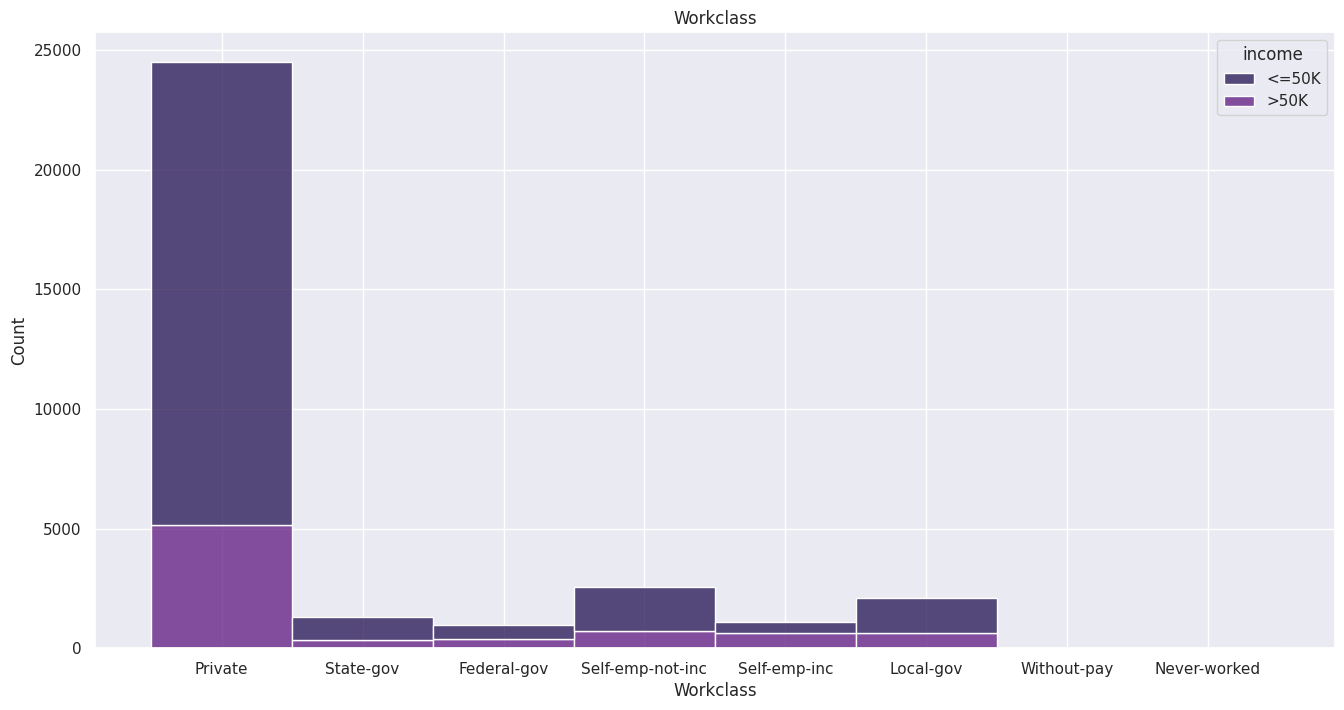

In [ ]:
plt.figure(figsize=(16, 8))

sns.histplot(data=df, x='workclass', hue='income', multiple='stack')

plt.xlabel('Workclass')
plt.title('Workclass')

plt.show()

In [ ]:
df.groupby('education').size()

education
10th              933
11th             1175
12th              433
1st-4th           166
5th-6th           332
7th-8th           645
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5353
Doctorate         413
HS-grad         10494
Masters          1722
Preschool          50
Prof-school       576
Some-college     7282
dtype: int64

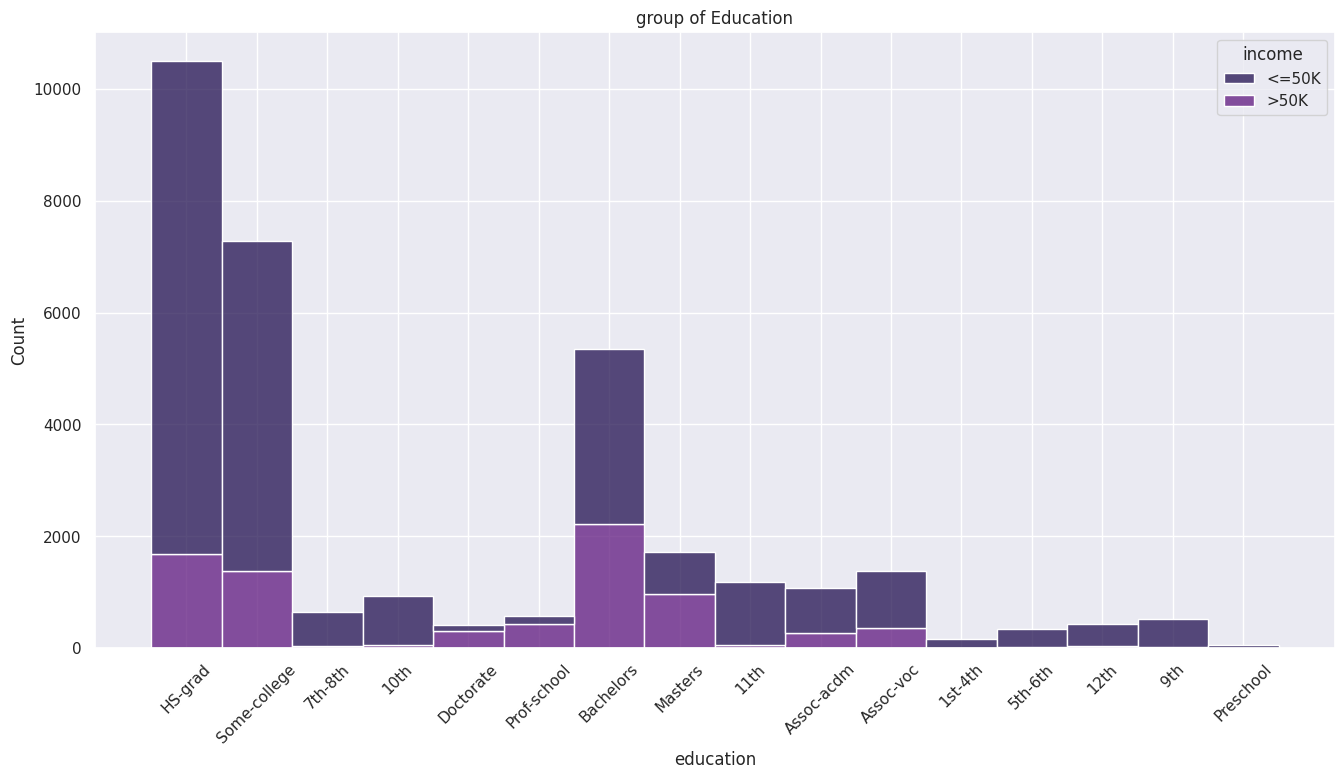

In [ ]:
plt.figure(figsize=(16, 8))

sns.histplot(data=df, x='education', hue='income', multiple='stack')

plt.xlabel('education')
plt.title('group of Education')
plt.xticks(rotation=45)


plt.show()

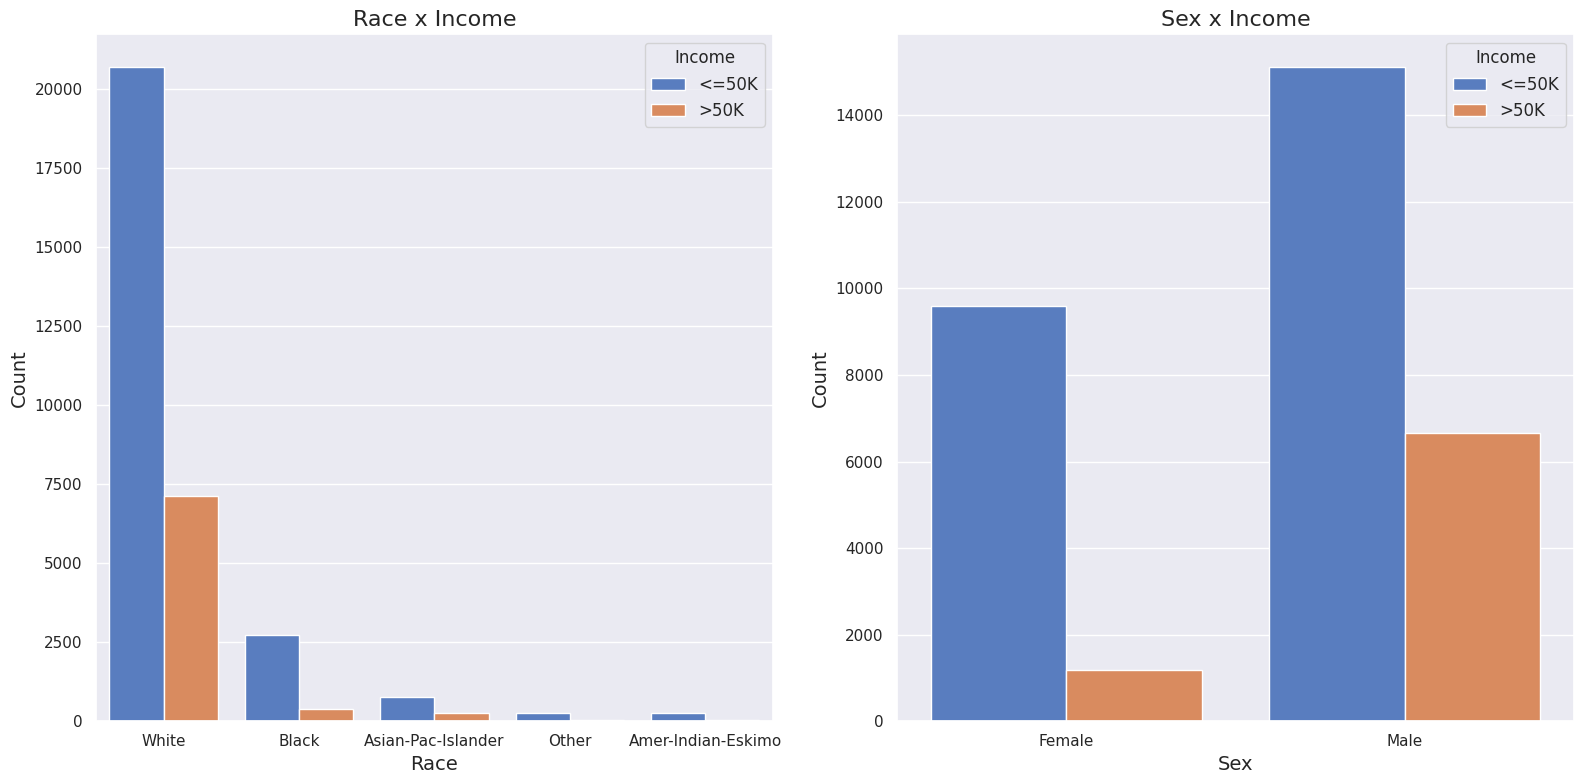

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.countplot(data=df, x='race', hue='income', palette='muted', ax=axes[0])
axes[0].set_title('Race x Income', fontsize=16)
axes[0].set_xlabel('Race', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].legend(title='Income', fontsize=12)

sns.countplot(data=df, x='sex', hue='income', palette='muted', ax=axes[1])
axes[1].set_title('Sex x Income', fontsize=16)
axes[1].set_xlabel('Sex', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].legend(title='Income', fontsize=12)

plt.tight_layout()

plt.show()

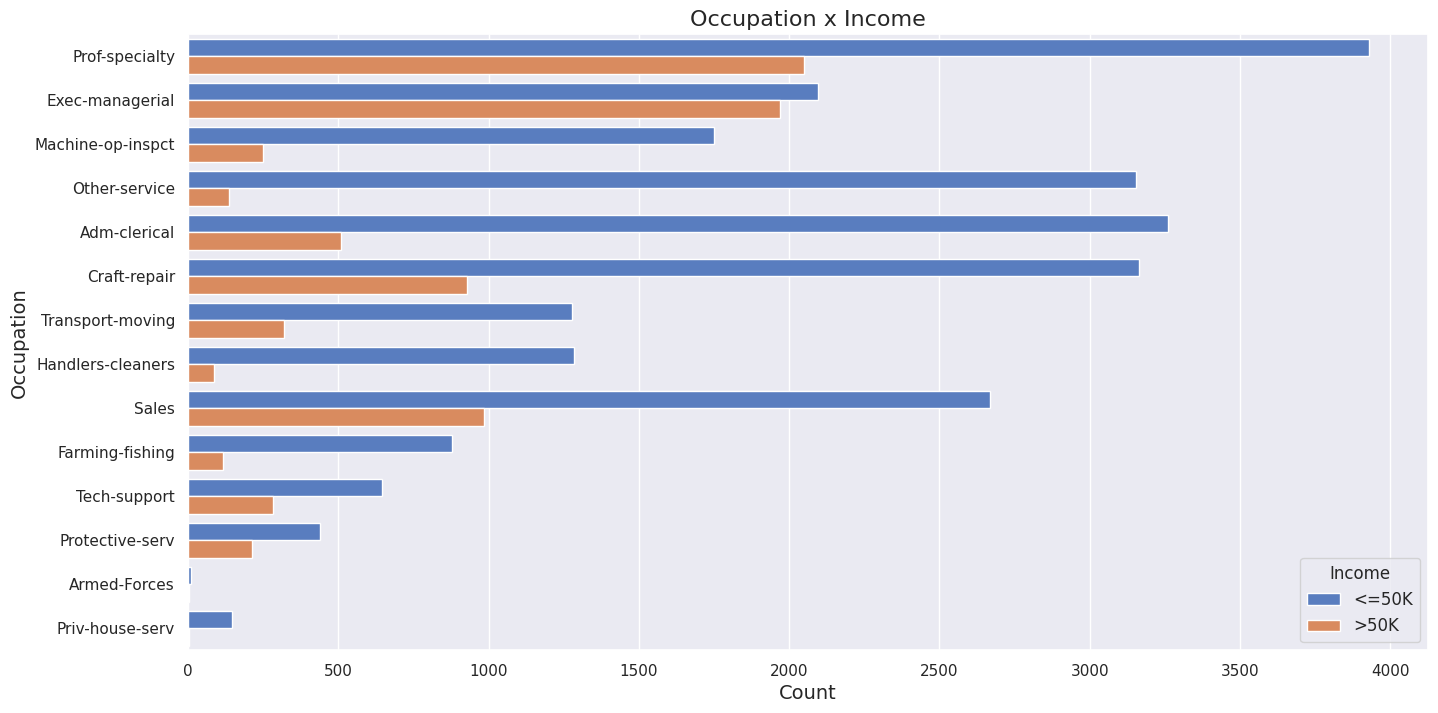

In [ ]:
plt.figure(figsize=(16, 8))

sns.countplot(data=df, y='occupation', hue='income', palette='muted')

plt.title('Occupation x Income', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Occupation', fontsize=14)

plt.legend(title='Income', fontsize=12)

plt.show()


 **Modeling**

In [ ]:
label_encoder = LabelEncoder()
categorical_columns = ['income', 'workclass', 'education', 'marital_status', 'occupation', 'relationship',
                       'race', 'sex', 'native_country']
df[categorical_columns] = df[categorical_columns].apply(label_encoder.fit_transform)

In [ ]:
df.head()

age  workclass  education  education_num  marital_status  occupation  \
0   90          3         11              9               6           9   
1   82          3         11              9               6           3   
2   66          3         15             10               6           9   
3   54          3          5              4               0           6   
4   41          3         15             10               5           9   

   relationship  race  sex  capital_gain  capital_loss  hours_per_week  \
0             1     4    0             0          4356              40   
1             1     4    0             0          4356              18   
2             4     2    0             0          4356              40   
3             4     4    0             0          3900              40   
4             3     4    0             0          3900              40   

   native_country  income  
0              38       0  
1              38       0  
2              38       0  
3              38       0  
4              38       0

(0.0, 100.0)

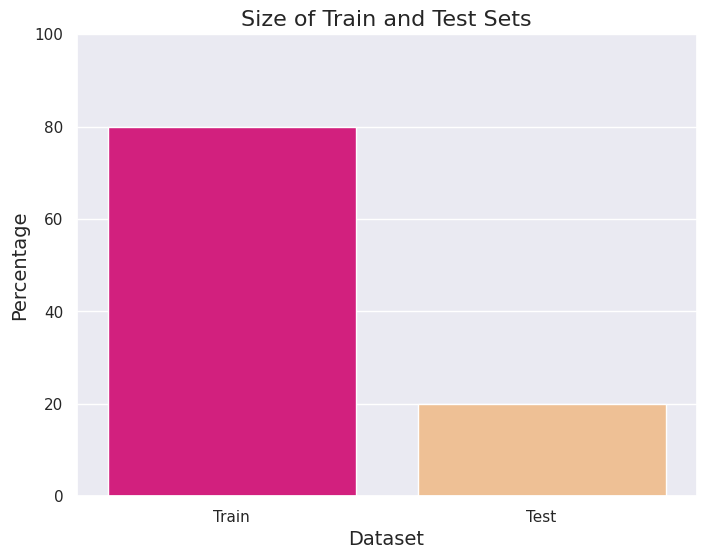

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['income']), df['income'],
                                                    test_size=0.2, random_state=42)
total_size = len(df)
train_size = len(x_train)
test_size = len(x_test)

train_percent = (train_size / total_size) * 100
test_percent = (test_size / total_size) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=['Train', 'Test'], y=[train_percent, test_percent], palette='Accent_r')
plt.title('Size of Train and Test Sets', fontsize=16)
plt.xlabel('Dataset', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.ylim(0, 100)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

**param_grid** : A list of dictionaries where each dictionary represents a set of parameters to be grid-searched.

In [ ]:
# Define the hyperparameters to search
param_grid = [
    {
        'classifier': [LogisticRegression()],
        'classifier__C': [0.001, 0.01, 0.1],
    },
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [None, 10, 20],
    },
    {
        'classifier': [RidgeClassifier],
    },
    {
        'classifier': [SVC],
    },
]

In [ ]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__C': [0.001, 0.01, 0.1]},
                         {'classifier': [DecisionTreeClassifier(max_depth=10)],
                          'classifier__max_depth': [None, 10, 20]},
                         {'classifier': [<class 'sklearn.linear_model._ridge.RidgeClassifier'>]},
                         {'classifier': [<class 'sklearn.svm._classes.SVC'>]}],
             verbose=2)

In [ ]:
print("Best Model:", grid_search.best_estimator_['classifier'])
print("Best Parameters: ", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Best Model: DecisionTreeClassifier(max_depth=10)
Best Parameters:  {'classifier': DecisionTreeClassifier(max_depth=10), 'classifier__max_depth': 10}
Best Score: 0.8541628277133861
Test Set Accuracy: 0.8563306699446834


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Set Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Test Set Accuracy: 0.8563306699446834
Precision: 0.7661510464058234
Recall: 0.5539473684210526
F1-Score: 0.6429935089728903


**Recall :** The ratio of correctly predicted positive observations to all observations in the actual class.
**F1-Score:** The mean of precision and recall.
especially useful when you need a single metric to evaluate the model's performance.

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

param_grid = [
    {
        'classifier': [LogisticRegression()],
        'classifier__C': [0.01, 0.1, 1],
        'classifier__penalty': ['l2'],
        'classifier__solver': ['liblinear'],
    },
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [10, 20],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2],
    },
     {
        'classifier': [RidgeClassifier()],
        'classifier__alpha': [0.1, 1.0, 10.0],
    },
    {
        'classifier': [SVC()],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf'],
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [10, 20],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2],
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5],
        'classifier__weights': ['uniform', 'distance'],
    },
  ]

grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(x_train, y_train)
print(f"Best Model: {grid_search.best_estimator_['classifier']}")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Model: RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5)
Best Parameters: {'classifier': RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5), 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best Score: 0.8650736994150325


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Set Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Test Set Accuracy: 0.8661647203441918
Precision: 0.7509667440061871
Recall: 0.6388157894736842
F1-Score: 0.6903661571276218
